# CIS 678 - Machine Learning - Kaggle Challenge 3: MNIST Digit Classification

<!-- ## Data Loading -->

<!-- ## Model Implementation -->

<!-- ## Model Evaluation -->

<!-- ## Conclusion -->

## Notebook Configuration
Before running our model, let's change our working directory over to our Python scripts by running the following shell script:

In [1]:
!echo sourcing MNIST model directory...
%cd '../model/src/'

sourcing MNIST model directory...
/Users/jppalacios/academic/fall2023/cis678/ml-challenge-3/model/src


## Importing our Custom Neural Network Libraries
Now that were are under the right directory, let's start off by importing all of our custom Python scripts.

In [2]:
import numpy as np

# custom modules
from toolkit import Toolkit
from parameters import ParameterManager
from model import Model

# used for visualizing our training progress
from rich.progress import track

# import cross validation libraries
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# creating our notebook toolkit helper
tools = Toolkit()
tools.configure(name = 'Notebook', level = 'INFO')

## Parameter Configuration
Parameter selection is model development makes it easier to optimize our model.
For example, if we can tune our model's learning rate value and see its effects on model performance.
Using our custom `ParameterManager` class, we can easily create a variety of parameters to pass onto our MNIST model.

In [3]:
# hyper-parameter manager
parameters = ParameterManager()

# create learning parameters
parameters.add_parameter(epochs = [10])
parameters.add_parameter(learning_rate = [0.001])
parameters.add_parameter(loss = ['mse'])
parameters.add_parameter(select_case = [-1])

# create an architecture parameter
parameters.add_nested_parameter(hidden_layers = [2], hidden_dimensions = [128, 64, 32], activation = ['tanh'])

tools.info(f'showing notebook parameters: {parameters}')

Notebook - INFO - showing notebook parameters: 
 test cases:
	case 1: {'epochs': 10, 'learning_rate': 0.001, 'loss': 'mse', 'select_case': -1, 'hidden_layers': 2, 'hidden_dimensions': [(784, 128), (128, 64), (64, 10)], 'activation': ('tanh', 'tanh', 'softmax')}



## Load in Data
This model will train on the MNIST data set.
A collection of three `csv` files are imported to generate our training and testing data sets.
Let's load in our `mnist_train.csv`, `mnist_train_targets.csv`, and `mnist_test.csv` files.


Notebook - INFO - loading in our MNIST data sets
Notebook - INFO - read in our data with shapes: (60000, 784) and (60000, 1) 
Notebook - INFO - read in our data with shapes: (10000, 784) and (10000, 1) 
Notebook - INFO - applying normalization to our train data
Notebook - INFO - visualizing a few MNIST training samples...


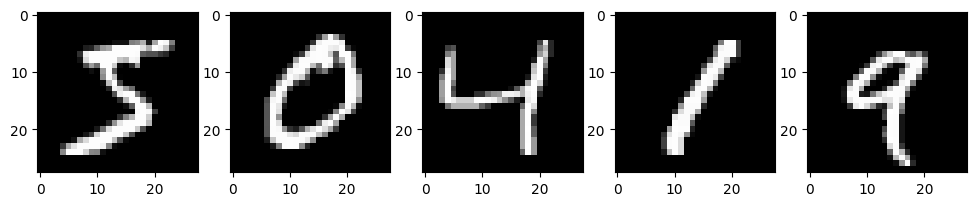

Notebook - INFO - visualizing a few MNIST testing samples...


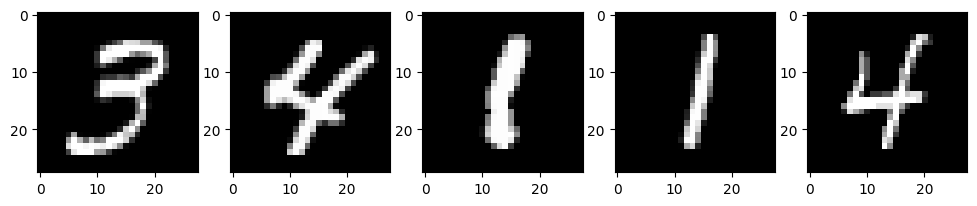

Notebook - WARNING - plots should be labaled!


In [4]:
tools.info("loading in our MNIST data sets")

train_data    = tools.load_data("../data/train/mnist_train.csv")
train_targets = tools.load_data("../data/train/mnist_train_targets.csv", transpose = False)
test_data     = tools.load_data("../data/test/mnist_test.csv")
test_targets  = np.zeros((test_data.shape[0], 1), dtype=int)

tools.info(f"read in our data with shapes: {train_data.shape} and {train_targets.shape} ")
tools.info(f"read in our data with shapes: {test_data.shape} and {test_targets.shape} ")

tools.info("applying normalization to our train data")
train_data = tools.normalize(train_data)
test_data  = tools.normalize(test_data)

tools.info("visualizing a few MNIST training samples...")
tools.visualize(train_data)

tools.info("visualizing a few MNIST testing samples...")
tools.visualize(test_data)

# tools.warning("plots should be labaled!")

## MNIST Model Configuration and Compilation
With our training and testing data sets ready for processing and all of our tunable parameters declared, we can start compiling our custom neural architecture.

In [5]:
mnist_model = Model(debug_mode = False)

mnist_model.configure(parameters = parameters)

MNIST Model - INFO - model configured


## Cross-Validating Model Performance
The following section describes our model performance over all parameter variations

MNIST Model - INFO - training case 1/1: 10 epochs, 0.001 learning rate (mse)
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

MNIST Model - INFO - epoch 1/10, loss: 0.0403, accuracy: 72.7%
MNIST Model - INFO - epoch 2/10, loss: 0.0340, accuracy: 78.5%
MNIST Model - INFO - epoch 3/10, loss: 0.0329, accuracy: 79.2%
MNIST Model - INFO - epoch 4/10, loss: 0.0326, accuracy: 79.5%
MNIST Model - INFO - epoch 5/10, loss: 0.0323, accuracy: 79.7%
MNIST Model - INFO - epoch 6/10, loss: 0.0320, accuracy: 79.9%
MNIST Model - INFO - epoch 7/10, loss: 0.0316, accuracy: 80.1%
MNIST Model - INFO - epoch 8/10, loss: 0.0316, accuracy: 80.2%
MNIST Model - INFO - epoch 9/10, loss: 0.0316, accuracy: 80.2%
MNIST Model - INFO - epoch 10/10, loss: 0.0314, accuracy:

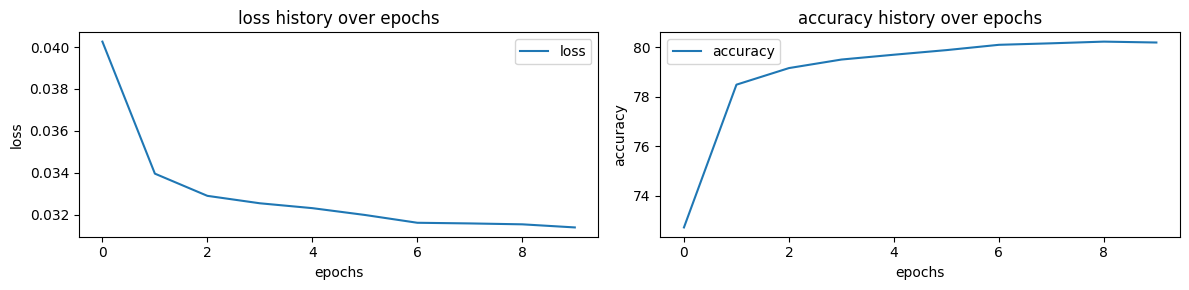

MNIST Model - INFO - model prediction based off of the following neural architecture:
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

Notebook - INFO - cross-validation accuracy: 79.9%
MNIST Model - INFO - training case 1/1: 10 epochs, 0.001 learning rate (mse)
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

MNIST Model - INFO - epoch 1/10, loss: 0.0394, accuracy: 73.5%
MNIST Model - INFO - epoch 2/10, loss: 0.0335, accuracy: 78.8%
MNIST Model - INFO - epoch 3/10, loss: 0.0325, accuracy: 79.5%

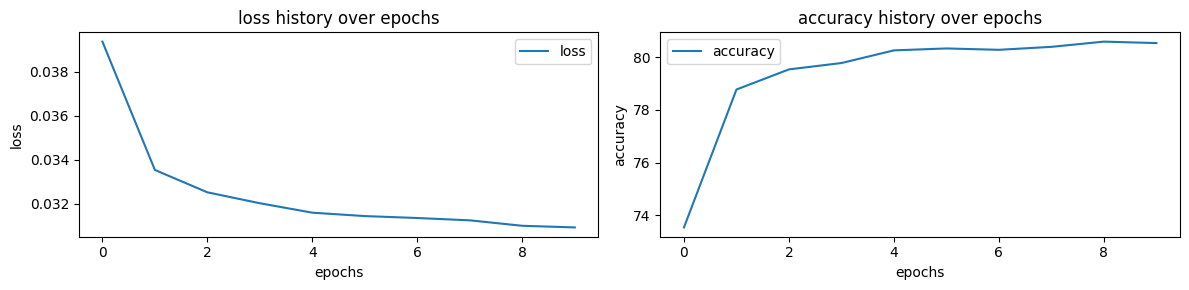

MNIST Model - INFO - model prediction based off of the following neural architecture:
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

Notebook - INFO - cross-validation accuracy: 80.8%
MNIST Model - INFO - training case 1/1: 10 epochs, 0.001 learning rate (mse)
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

MNIST Model - INFO - epoch 1/10, loss: 0.0382, accuracy: 74.5%
MNIST Model - INFO - epoch 2/10, loss: 0.0329, accuracy: 79.1%
MNIST Model - INFO - epoch 3/10, loss: 0.0320, accuracy: 79.9%

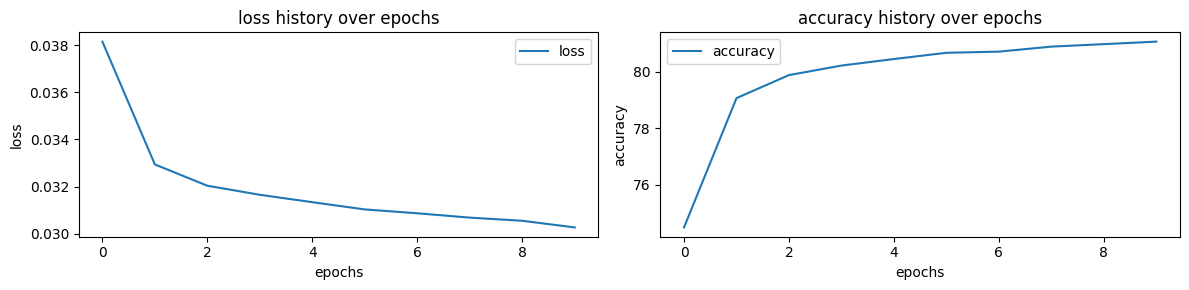

MNIST Model - INFO - model prediction based off of the following neural architecture:
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

Notebook - INFO - cross-validation accuracy: 79.2%
MNIST Model - INFO - training case 1/1: 10 epochs, 0.001 learning rate (mse)
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

MNIST Model - INFO - epoch 1/10, loss: 0.0401, accuracy: 73.0%
MNIST Model - INFO - epoch 2/10, loss: 0.0332, accuracy: 79.0%
MNIST Model - INFO - epoch 3/10, loss: 0.0324, accuracy: 79.7%

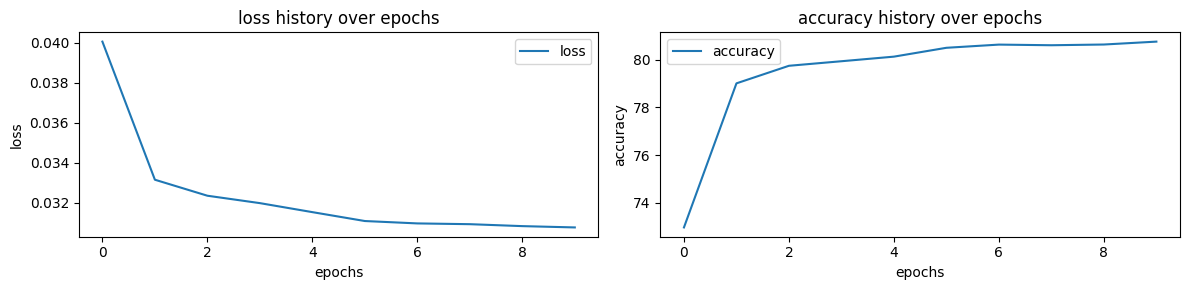

MNIST Model - INFO - model prediction based off of the following neural architecture:
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

Notebook - INFO - cross-validation accuracy: 77.7%
MNIST Model - INFO - training case 1/1: 10 epochs, 0.001 learning rate (mse)
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

MNIST Model - INFO - epoch 1/10, loss: 0.0382, accuracy: 74.5%
MNIST Model - INFO - epoch 2/10, loss: 0.0331, accuracy: 79.1%
MNIST Model - INFO - epoch 3/10, loss: 0.0325, accuracy: 79.5%

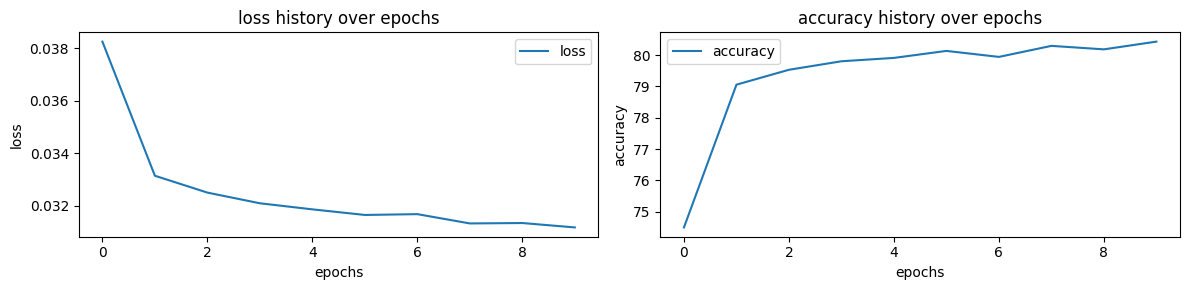

MNIST Model - INFO - model prediction based off of the following neural architecture:
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

Notebook - INFO - cross-validation accuracy: 80.1%


In [6]:

cross_validate = True

if cross_validate:
  # Combine your train and test data and targets
  X = np.concatenate((train_data, test_data), axis=0)
  y = np.concatenate((train_targets, test_targets), axis=0)

  #> performing cross-validation to assess model performance
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  #> run cross-validation train and predict loop
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Your model training and evaluation here
    mnist_model.fit(X_train, y_train)
    y_pred = mnist_model.predict(X_test)

    # Evaluate the model (use appropriate evaluation metric based on your problem)
    accuracy = accuracy_score(y_test, y_pred)
    tools.info(f"cross-validation accuracy: {accuracy * 100:.1f}%")


## Generating Kaggle Submission
Now that we have cross-validated our model's performance, we can retrain our model with the full training data set to generate our test targets.
The model's loss and accuracy histories are shown to better visualize and assess how well our model improved during the training phase.

In [7]:
# mnist_model.fit(train_data, train_targets)

test_targets = mnist_model.predict(test_data)

tools.info("saving our test targets")

tools.save_data("../data/test/mnist_test_targets.csv", test_targets)

MNIST Model - INFO - model prediction based off of the following neural architecture:
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

Notebook - INFO - saving our test targets


## PyTorch Model
Now, we can take a look at how well our PyTorch model does compared to our custom neural network model.

In [8]:
!echo sourcing MNIST PyTorch model directory...
%pwd
%cd ../pytorch
!python main.py --epochs 10 --lr 0.005 --gamma 0.6

sourcing MNIST PyTorch model directory...
/Users/jppalacios/academic/fall2023/cis678/ml-challenge-3/model/pytorch
using cpu device...

Cross Validation Fold 1/5:
Train Epoch: 1 [0/48000 (0%)]	Loss: 2.978106
Train Epoch: 1 [640/48000 (1%)]	Loss: 2.087789
Train Epoch: 1 [1280/48000 (3%)]	Loss: 1.744971
Train Epoch: 1 [1920/48000 (4%)]	Loss: 1.471578
Train Epoch: 1 [2560/48000 (5%)]	Loss: 1.120301
Train Epoch: 1 [3200/48000 (7%)]	Loss: 0.985239
Train Epoch: 1 [3840/48000 (8%)]	Loss: 0.974756
Train Epoch: 1 [4480/48000 (9%)]	Loss: 0.990294
Train Epoch: 1 [5120/48000 (11%)]	Loss: 0.792091
Train Epoch: 1 [5760/48000 (12%)]	Loss: 0.753241
Train Epoch: 1 [6400/48000 (13%)]	Loss: 0.768104
Train Epoch: 1 [7040/48000 (15%)]	Loss: 0.666333
Train Epoch: 1 [7680/48000 (16%)]	Loss: 0.701156
Train Epoch: 1 [8320/48000 (17%)]	Loss: 0.534788
Train Epoch: 1 [8960/48000 (19%)]	Loss: 0.728753
Train Epoch: 1 [9600/48000 (20%)]	Loss: 0.799364
Train Epoch: 1 [10240/48000 (21%)]	Loss: 0.510330
Train Epoch: 1 [

# Performance
This model performs much better than the custom version.
One important thing to note is that this original program was written on a CUDA-enabled computer but for the purposes of this Kaggle submission, PyTorch runs in cpu mode.


## Conclusion
As we can see, this implementation did not do as well as the PyTorch implementation, however, it was fundamental in my understanding of how to implement forward, backwards, and error gradient calculations for a reconfigurable Python implementation from scratch.

## References
[1] Numpy Neural Network Github Repo
    https://github.com/ddbourgin/numpy-ml/blob/master/numpy_ml/neural_nets/activations/activations.py#L73-L137

[2] Neural Networl Architecture inspired by Omar Aflak
    https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

[3] PyTorch MNIST Example GitHub, https://github.com/pytorch/examples/blob/main/mnist/main.py
